In [1]:
# Custome Dataset NoteBook
#-----------------------------------------------------

# Depending on what you are working on, vision, text, audio, recommendation, you will want to look into each of pytorch libraries for existing data 
# loading functions and customizable data loading functions

In [2]:
# 0. importing pytorch and setting up device-agnostic code

import torch
from torch import nn

#Note: PyTorch 1.10.0+ is required for this course
torch.__version__

'2.1.0+cu118'

In [3]:
# set up the device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
# 1. get data
# Our dataset is a subset of the food 101 dataset 
# food 101 starts 101 different classes of food.
# our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing).

#----- why do this ? --------------

# When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary. 

# The whole point is to speed up how fast you can experiment

In [5]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    # download pizzaa, steak, sushi dat
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak and sushi data...")
        zip_ref.extractall(image_path)

data\pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak and sushi data...


In [6]:
## 2. Becoming one with the data (data preparation and data exploration)
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its content"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'


In [8]:
# set up train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [9]:
#2.1 Visualizing and image
# -- Lets write some code:
# 1. Get all of the image paths
# 2. Pick a radom image path using Python's random.choice()
# 3. Get the image class name using `pathlib.Path.parent.stem`
# 4. Since we are working with images, lets open the image with Ptthon's with python's PIL
# 5. We will then show the image and print metadata

The random image file name we choiced: [data\pizza_steak_sushi\test\sushi\2715127.jpg]
The Class name of the random image file we choiced [sushi]
Image height: 512
Image width: 512


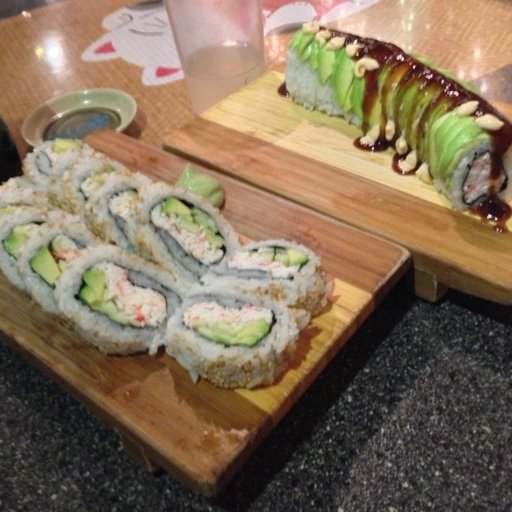

In [10]:
import random
from PIL import Image
# Set seed 
# random.seed(42)

# 1. Get all iamge paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image paths
random_image_path = random.choice(image_path_list)

# 3. Get the image class name using `pathlib.Path.parent.stem`
image_class = random_image_path.parent.stem

# 4. Since we are working with images, lets open the image with Ptthon's with python's PIL
img = Image.open(random_image_path)

# 5. print the metadata
print(f"The random image file name we choiced: [{random_image_path}]")
print(f"The Class name of the random image file we choiced [{image_class}]")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Text(0.5, 1.0, 'Image class: sushi | Image shape: (512, 512, 3) -> [height, width, color_channels]')

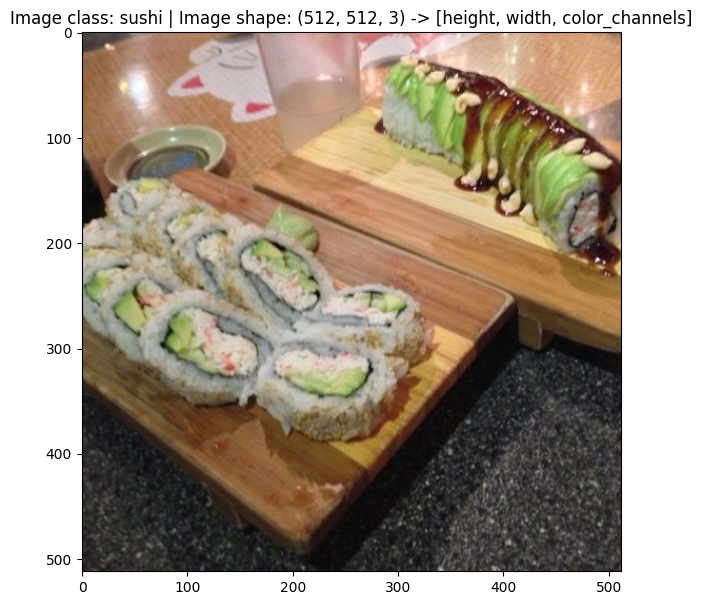

In [11]:
import numpy as np 
import matplotlib.pyplot as plt

# Turn the image into array [IMPORTANT]
image_as_array = np.asarray(img)
# plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(image_as_array)
plt.title(f"Image class: {image_class} | Image shape: {image_as_array.shape} -> [height, width, color_channels]")

In [17]:
## 3. Transforming data into the tensor format
# Before we can use our image data with pytorch:
# 1. Turn your target data into tensors (in our case, numerical representation of our images).
# 2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DAtaLoader`, 
#    we'll call these `Dataset` and `DataLoader`.

In [19]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [22]:
# 3.1 transforming data with [torchvision.transforms]
# -- Write a transform for image --
# ?? nn.sequential Vs. transforms.Compose?? 
data_transform = transforms.Compose([
    # Resize our images to 64 x 64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [27]:
transformed_data = data_transform(img)
transformed_data

tensor([[[0.6745, 0.7373, 0.7922,  ..., 0.3216, 0.3020, 0.2980],
         [0.7961, 0.8235, 0.8392,  ..., 0.4431, 0.3176, 0.2824],
         [0.8196, 0.8314, 0.8431,  ..., 0.5804, 0.5216, 0.4706],
         ...,
         [0.2510, 0.2235, 0.2392,  ..., 0.2118, 0.1843, 0.1686],
         [0.2588, 0.2392, 0.2275,  ..., 0.2118, 0.1647, 0.1608],
         [0.2196, 0.2314, 0.2196,  ..., 0.2000, 0.1922, 0.1804]],

        [[0.5059, 0.5647, 0.6078,  ..., 0.2863, 0.2745, 0.2667],
         [0.6039, 0.6235, 0.6392,  ..., 0.3686, 0.2667, 0.2431],
         [0.6157, 0.6235, 0.6392,  ..., 0.4314, 0.3843, 0.3569],
         ...,
         [0.2392, 0.2196, 0.2314,  ..., 0.2039, 0.1765, 0.1569],
         [0.2471, 0.2314, 0.2196,  ..., 0.2039, 0.1569, 0.1490],
         [0.1961, 0.2157, 0.2118,  ..., 0.1843, 0.1725, 0.1647]],

        [[0.3804, 0.4157, 0.4549,  ..., 0.2902, 0.2667, 0.2588],
         [0.4549, 0.4667, 0.4863,  ..., 0.3333, 0.2549, 0.2392],
         [0.4667, 0.4667, 0.4824,  ..., 0.3137, 0.2902, 0.

In [29]:
def plot_transformed_images(image_paths, transfom, n=3, seed=42):
    """
    Selects random images from a path of images and loads/transforms 
    then then plots the orginal vs the transformed version.
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    

SyntaxError: incomplete input (941973328.py, line 1)